Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,58.001,0.773,56.589,59.485,0.012,0.008,4710.0,4178.0,1.0
sigma,2.339,0.682,1.344,3.561,0.011,0.008,4324.0,4072.0,1.0


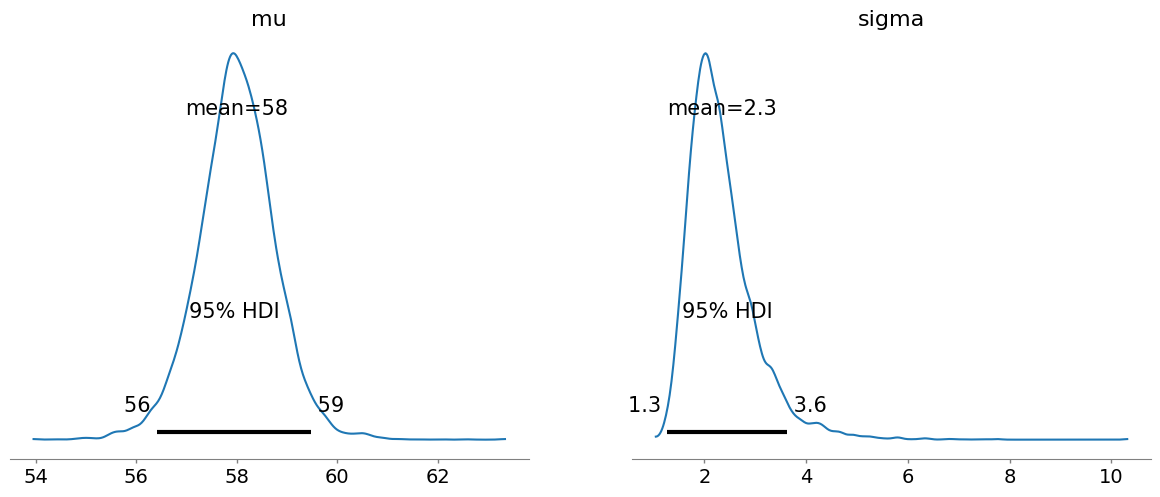

In [5]:
import pymc as pm
import numpy as np
import arviz as az

observed_decibels = [56, 60, 58, 55, 57, 59, 61, 56, 58, 60]

mean = sum(observed_decibels) / len(observed_decibels)

with pm.Model() as model:
    mu = pm.Normal("mu", mu=mean, sigma=10)
    
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    X = pm.Normal("X", mu=mu, sigma=sigma, observed=observed_decibels)
    
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)


az.plot_posterior(trace, var_names=["mu", "sigma"], hdi_prob=0.95)
az.summary(trace, var_names=["mu", "sigma"])
